<a href="https://colab.research.google.com/github/y-eon/TIL/blob/master/0709_data_analysis_final_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 데이터 분석 과정 평가
---

## 1번
- sklearn의 load_boston 을 이용해서 boston 데이터를 로드한다.
- Linear Regression, Ridge Regression, Lasso Regression을 수행한다.
- 학습된 모델의 r2_score와 coef_, bias를 출력한다.
 - (Ridge와 Lasso의 알파값은 0.3으로 설정한다)

In [ ]:
from sklearn.datasets import load_boston
boston = load_boston()

X = boston.data
y = boston.target
X.shape, y.shape

((506, 13), (506,))

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=42,test_size=0.2)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((404, 13), (404,), (102, 13), (102,))

In [ ]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso

#### Linear Regression

In [ ]:
lin_reg = LinearRegression().fit(X_train,y_train)

In [ ]:
train_score = lin_reg.score(X_train, y_train)
test_score = lin_reg.score(X_test, y_test)
print('train셋의 R^2 : {:.3f} \n test셋의 R^2 : {:.3f}'.format(train_score, test_score))

train셋의 R^2 : 0.751 
 test셋의 R^2 : 0.669


In [ ]:
print('*weight : {} \n *bias : {}'.format(lin_reg.coef_, lin_reg.intercept_))

*weight : [-1.13055924e-01  3.01104641e-02  4.03807204e-02  2.78443820e+00
 -1.72026334e+01  4.43883520e+00 -6.29636221e-03 -1.44786537e+00
  2.62429736e-01 -1.06467863e-02 -9.15456240e-01  1.23513347e-02
 -5.08571424e-01] 
 *bias : 30.246750993923925


#### Ridge

In [ ]:
ridge = Ridge(alpha=0.3).fit(X_train, y_train)

In [ ]:
train_score = ridge.score(X_train, y_train)
test_score = ridge.score(X_test, y_test)
print('train셋의 R^2 : {:.3f} \n test셋의 R^2 : {:.3f}'.format(train_score, test_score))

train셋의 R^2 : 0.750 
 test셋의 R^2 : 0.668


In [ ]:
print('*weight : {} \n *bias : {}'.format(ridge.coef_, ridge.intercept_))

*weight : [-1.11352783e-01  3.10286814e-02  2.60531613e-02  2.69191282e+00
 -1.38634794e+01  4.45542186e+00 -8.91583594e-03 -1.40020034e+00
  2.56269364e-01 -1.09981209e-02 -8.77211005e-01  1.24793530e-02
 -5.14786271e-01] 
 *bias : 27.959941444774536


#### Lasso

In [ ]:
lasso = Lasso(alpha=0.3).fit(X_train,y_train)

In [ ]:
train_score = lasso.score(X_train, y_train)
test_score = lasso.score(X_test, y_test)
print('train셋의 R^2 : {:.3f} \n test셋의 R^2 : {:.3f}'.format(train_score, test_score))

train셋의 R^2 : 0.732 
 test셋의 R^2 : 0.663


In [ ]:
print('*weight : {} \n *bias : {}'.format(lasso.coef_, lasso.intercept_))

*weight : [-9.96658335e-02  3.42747476e-02 -2.11838761e-03  0.00000000e+00
 -0.00000000e+00  3.72501465e+00 -6.12977694e-03 -1.02835422e+00
  2.42981490e-01 -1.32776941e-02 -7.37563894e-01  1.28089888e-02
 -6.11490803e-01] 
 *bias : 23.248693465008763


## 2번
- sklearn의 load_boston 을 이용해서 boston 데이터를 로드한다.
- sklearn에서 RandomForest를 최대 트리의 깊이를 2로 하고, estimator는 100개로 설정하여 수행한다.
- mean_squared_error를 출력하고, 각 feature 들의 중요도를 출력한다.


#### Boston Data load

In [ ]:
from sklearn.datasets import load_boston

boston = load_boston()
X = boston.data
y = boston.target

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=42,test_size=0.2)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((404, 13), (404,), (102, 13), (102,))

#### RandomForestRegressor

In [ ]:
from sklearn.ensemble import RandomForestRegressor
forest = RandomForestRegressor(n_estimators = 100, random_state = 42,max_depth=2)
forest.fit(X_train, y_train)
y_pred = forest.predict(X_test)

In [ ]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, y_pred)

21.725460484973674

In [ ]:
print("[feature중요도] : {}".format(forest.feature_importances_))

array([0.00398892, 0.        , 0.        , 0.        , 0.        ,
       0.61325531, 0.00107305, 0.001853  , 0.        , 0.        ,
       0.        , 0.        , 0.37982971])

## 3번
- Tensorflow를 사용해 Mnist 데이터를 분류하고 그 결과를 출력한다.
 - (어떤 알고리즘, 어떤 모델이든 상관 없다.) -> CNN으로 진행

#### Mnist Data load

In [ ]:
import tensorflow as tf
mnist = tf.keras.datasets.mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [ ]:
(X_train, y_train), (X_test, y_test) = mnist
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

#### Scaling

In [ ]:
X_train.min(), X_train.max()

(0, 255)

In [ ]:
import tensorflow as tf

In [ ]:
X_train, X_test = X_train/255, X_test/255
X_train = X_train[...,tf.newaxis]
X_test = X_test[...,tf.newaxis]
X_train.shape, X_test.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

#### CNN

In [ ]:
from tensorflow.keras import layers, models

In [ ]:
model = tf.keras.Sequential([
                             layers.Conv2D(32,(3,3),activation='relu'),
                             layers.MaxPool2D((2,2)),
                             layers.Conv2D(128,(3,3),activation='relu'),
                             layers.MaxPool2D((2,2)),
                             layers.Conv2D(256,(3,3),activation='relu'),
                             layers.MaxPool2D((2,2)),
                             layers.Flatten(),
                             layers.Dense(32,activation='relu'),
                             layers.Dense(10,activation='softmax')
])
model.compile(
            optimizer='adam',
            loss = 'sparse_categorical_crossentropy',
            metrics = 'accuracy'
)

In [ ]:
model.fit(X_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 119s 64ms/step - loss: 0.1748 - accuracy: 0.9448
Epoch 2/5
1875/1875 [==============================] - 119s 64ms/step - loss: 0.0590 - accuracy: 0.9818
Epoch 3/5
1875/1875 [==============================] - 119s 63ms/step - loss: 0.0405 - accuracy: 0.9878
Epoch 4/5
1875/1875 [==============================] - 118s 63ms/step - loss: 0.0308 - accuracy: 0.9901
Epoch 5/5
1875/1875 [==============================] - 119s 63ms/step - loss: 0.0226 - accuracy: 0.9929


In [ ]:
model.evaluate(X_train, y_train), model.evaluate(X_test, y_test)

313/313 [==============================] - 5s 14ms/step - loss: 0.0534 - accuracy: 0.9867


([0.01993349939584732, 0.9934999942779541],
 [0.05338094383478165, 0.9866999983787537])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              multiple                  320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) multiple                  0         
_________________________________________________________________
conv2d_1 (Conv2D)            multiple                  36992     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 multiple                  0         
_________________________________________________________________
conv2d_2 (Conv2D)            multiple                  295168    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 multiple                  0         
_________________________________________________________________
flatten (Flatten)            multiple                  0

## 4번
Yena 시계열 예측을 하시오.   
-  시계열 예측시 10개의 데이터셋으로 다음 1개를 예측한다. 
- train_set과 test_set으로 각각 나눠, 예측하되 예측이 끝난 후,  ploting을 한다.
- mse가 평가 지표로 사용되며, y_train std의 10% 아래로 나오도록 학습한다.
- test에 대한 mse를 측정하고 출력한다.
 - (이 때 예측시에는 온도(T (degC))로만 컬럼을 사용하고, 예측 타겟도 온도로 한다.)

#### Yena Data load

In [ ]:
!wget https://s3.amazonaws.com/keras-datasets/jena_climate_2009_2016.csv.zip #데이터셋 다운로드
!unzip jena_climate_2009_2016.csv.zip #데이터셋 압축풀기

--2020-07-09 13:20:05--  https://s3.amazonaws.com/keras-datasets/jena_climate_2009_2016.csv.zip
Resolving s3.amazonaws.com (s3.amazonaws.com)... 52.216.245.174
Connecting to s3.amazonaws.com (s3.amazonaws.com)|52.216.245.174|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 13568290 (13M) [application/zip]
Saving to: ‘jena_climate_2009_2016.csv.zip’

jena_climate_2009_2 100%[===================>]  12.94M  7.05MB/s    in 1.8s    

2020-07-09 13:20:08 (7.05 MB/s) - ‘jena_climate_2009_2016.csv.zip’ saved [13568290/13568290]

Archive:  jena_climate_2009_2016.csv.zip
  inflating: jena_climate_2009_2016.csv  


In [ ]:
import pandas as pd
Data = pd.read_csv('jena_climate_2009_2016.csv') #데이터셋 불러오기
Data.head()

,Date Time,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
0,01.01.2009 00:10:00,996.52,-8.02,265.40,-8.90,93.3,3.33,3.11,0.22,1.94,3.12,1307.75,1.03,1.75,152.3
1,01.01.2009 00:20:00,996.57,-8.41,265.01,-9.28,93.4,3.23,3.02,0.21,1.89,3.03,1309.80,0.72,1.50,136.1
2,01.01.2009 00:30:00,996.53,-8.51,264.91,-9.31,93.9,3.21,3.01,0.20,1.88,3.02,1310.24,0.19,0.63,171.6
3,01.01.2009 00:40:00,996.51,-8.31,265.12,-9.07,94.2,3.26,3.07,0.19,1.92,3.08,1309.19,0.34,0.50,198.0
4,01.01.2009 00:50:00,996.51,-8.27,265.15,-9.04,94.1,3.27,3.08,0.19,1.92,3.09,1309.00,0.32,0.63,214.3


In [ ]:
Data = Data.iloc[:,2]
Data.shape

(420551,)

In [ ]:
import numpy as np

In [ ]:
data = np.array(Data)
X = []
y = []
for i in range(len(Data)-10):
  X.append(data[i:i+10])
  y.append(data[i+10])
X = np.array(X)
y = np.array(y)
X.shape, y.shape

((420541, 10), (420541,))

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=42)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((315405, 10), (315405,), (105136, 10), (105136,))

#### Scaling

In [ ]:
mean = X_train.mean()
std = X_train.std()
X_train = (X_train-mean)/std
X_test = (X_test-mean)/std
X_train.shape, X_test.shape

((315405, 10), (105136, 10))

In [ ]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((315405, 10), (315405,), (105136, 10), (105136,))

In [ ]:
X_train = X_train.reshape(-1,10,1)
y_train = y_train.reshape(-1, 1)
X_test = X_test.reshape(-1,10,1)
y_test = y_test.reshape(-1, 1)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((315405, 10, 1), (315405, 1), (105136, 10, 1), (105136, 1))

#### GRU

In [ ]:
model = models.Sequential()
model.add(layers.GRU(8,return_sequences=True))
model.add(layers.GRU(6))
model.add(layers.Dense(1))

model.compile(optimizer='adam',loss='mse')

In [ ]:
model.fit(X_train, y_train, epochs=5)

Epoch 1/5
9857/9857 [==============================] - 78s 8ms/step - loss: 11.7895
Epoch 2/5
9857/9857 [==============================] - 77s 8ms/step - loss: 0.0636
Epoch 3/5
9857/9857 [==============================] - 78s 8ms/step - loss: 0.0476
Epoch 4/5
9857/9857 [==============================] - 77s 8ms/step - loss: 0.0460
Epoch 5/5
9857/9857 [==============================] - 78s 8ms/step - loss: 0.0452


In [ ]:
y_test.std()

8.41926324355119

#### Plot

In [ ]:
import matplotlib.pyplot as plt

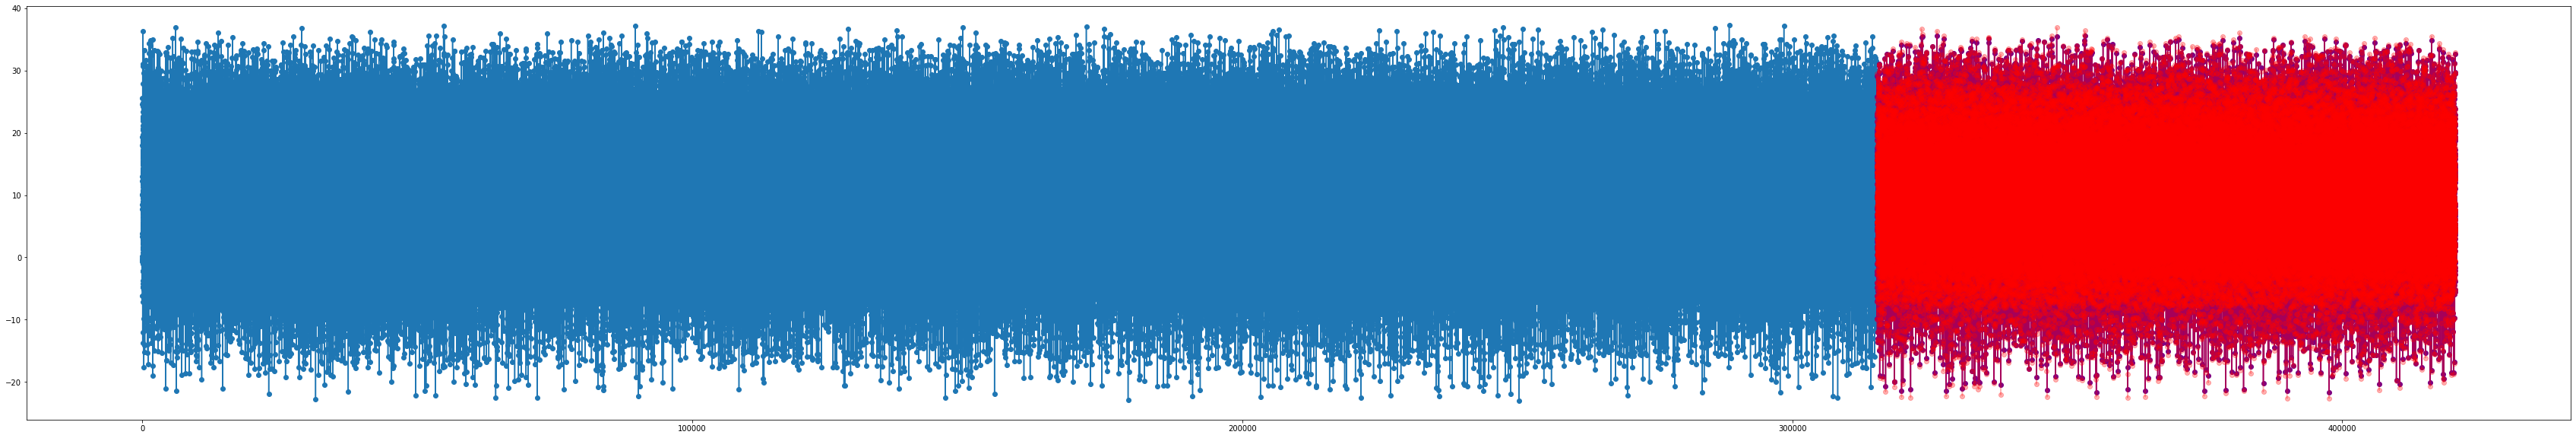

In [ ]:
y_hat = model.predict(X_test)
y_axis = np.arange(0,len(y_train))
y2_axis = np.arange(len(y_train),len(y_train)+len(y_hat))

plt.figure(figsize=(60,10))
plt.plot(y_axis, y_train.reshape(len(X_train),),'-o')
plt.plot(y2_axis, y_hat.reshape(len(X_test),),'-o',color='red',label='predicted')
plt.plot(y2_axis, y_test.reshape(len(X_test),),'-o',color='purple',alpha=0.3, label='actual')
plt.legend(fontsize=40)
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, y_hat)

0.052014911224035926